In [7]:
import plot_tools
import importlib

OUTPUTS = r"D:\World Bank\Paper - Child Mortality and Climate Shocks\Outputs"

spi = "spi1"
temp = "stdm_t"
stat = "avg"
std = 1

([1.298, -0.002, 0.964, 0.428, 1.773, 0.774, 0.255, -0.25, 0.59, 1.158], [-1.369, -0.535, -1.627, -0.39, -1.564, 0.237, -0.392, -0.235, -0.089, -0.56])
([0.64336, -0.443, 0.39560000000000006, 0.06344, 1.14384, -0.11387999999999998, -0.22519999999999996, -1.0438, 0.19995999999999997, 0.29167999999999994], [-2.12556, -1.0367600000000001, -2.36592, -0.82316, -2.36564, -0.62344, -0.87024, -1.10524, -0.5104, -1.48708])


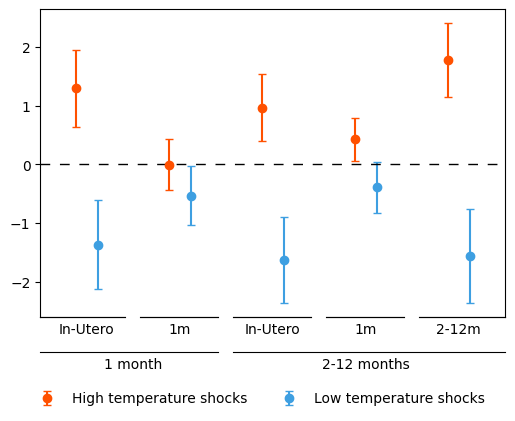

In [206]:
importlib.reload(plot_tools)

# Main Plot
file_path = rf"{OUTPUTS}\linear_dummies_true_{spi}_{stat}_{temp}  standard_fe.tex"  # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

values_sfe = (outdata["temp_pos"]["coefs"] + outdata["spi_pos"]["coefs"], outdata["temp_neg"]["coefs"] + outdata["spi_neg"]["coefs"])
lower_sfe  = (outdata["temp_pos"]["lower"] + outdata["spi_pos"]["lower"], outdata["temp_neg"]["lower"] + outdata["spi_neg"]["lower"])
upper_sfe  = (outdata["temp_pos"]["upper"] + outdata["spi_pos"]["upper"], outdata["temp_neg"]["upper"] + outdata["spi_neg"]["upper"])

print(values_sfe)
print(lower_sfe)

plot_tools.plot_regression_coefficients(
    values_sfe, 
    upper_sfe,
    lower_sfe,
    margin=0.14,
    colors=["#ff5100", "#3e9fe1"], 
    labels=["High temperature shocks","Low temperature shocks"], 
    plot="only_temp", 
    outpath=rf"{OUTPUTS}\Figures\coefplot_temp.png"
)

plot_tools.plot_regression_coefficients(
    values_sfe, 
    upper_sfe,
    lower_sfe,
    margin=0.14,
    colors=["#3e9fe1", "#ff5100"], 
    labels=["High precipitation shocks","Low precipitation shocks"], 
    plot="only_spi", 
    outpath=rf"{OUTPUTS}\Figures\coefplot_prec.png"
)

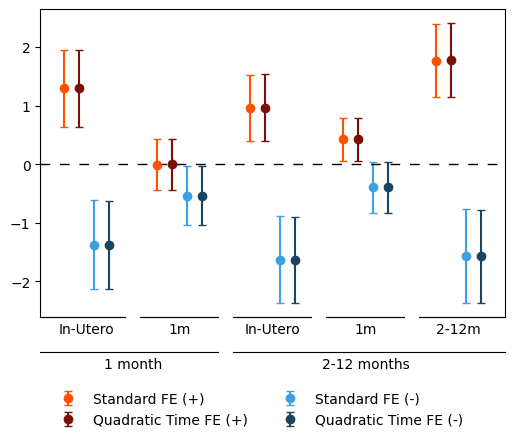

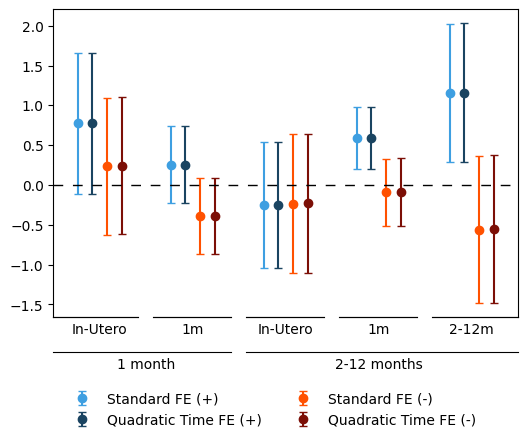

In [207]:
# Fixed effects
file_path = rf"{OUTPUTS}\linear_dummies_true_{spi}_{stat}_{temp}  quadratic_time_fe.tex"  # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

values_tfe = (outdata["temp_pos"]["coefs"] + outdata["spi_pos"]["coefs"], outdata["temp_neg"]["coefs"] + outdata["spi_neg"]["coefs"])
lower_tfe  = (outdata["temp_pos"]["lower"] + outdata["spi_pos"]["lower"], outdata["temp_neg"]["lower"] + outdata["spi_neg"]["lower"])
upper_tfe  = (outdata["temp_pos"]["upper"] + outdata["spi_pos"]["upper"], outdata["temp_neg"]["upper"] + outdata["spi_neg"]["upper"])

values = [values_sfe[0], values_tfe[0], values_sfe[1], values_tfe[1]]
lower  = [lower_sfe[0], lower_tfe[0], lower_sfe[1], lower_tfe[1]]
upper =  [upper_sfe[0], upper_tfe[0], upper_sfe[1], upper_tfe[1]]

plot_tools.plot_regression_coefficients(
    values, 
    upper, 
    lower, 
    margin=0.1, 
    colors=["#ff5100", "#7c0f06", "#3e9fe1", "#1a4461", ], 
    labels=["Standard FE (+)","Quadratic Time FE (+)", "Standard FE (-)","Quadratic Time FE (-)"], 
    plot="only_temp", 
    outpath=rf"{OUTPUTS}\Figures\coefplot_fe_pos.png"
)
plot_tools.plot_regression_coefficients(
    values, 
    upper, 
    lower, 
    margin=0.1, 
    colors=["#3e9fe1", "#1a4461", "#ff5100", "#7c0f06"], 
    labels=["Standard FE (+)","Quadratic Time FE (+)", "Standard FE (-)","Quadratic Time FE (-)"], 
    plot="only_spi", 
    outpath=rf"{OUTPUTS}\Figures\coefplot_fe_pos.png"
)

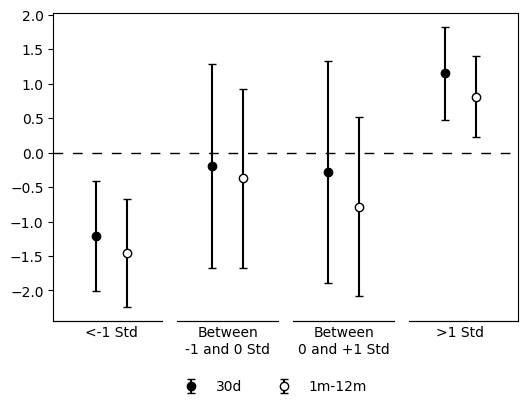

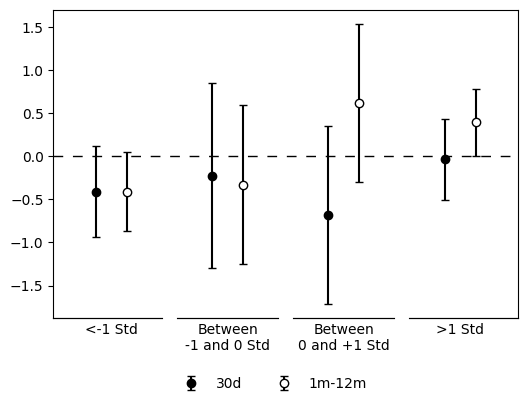

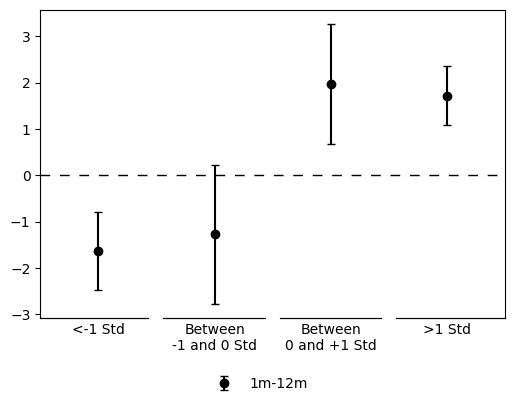

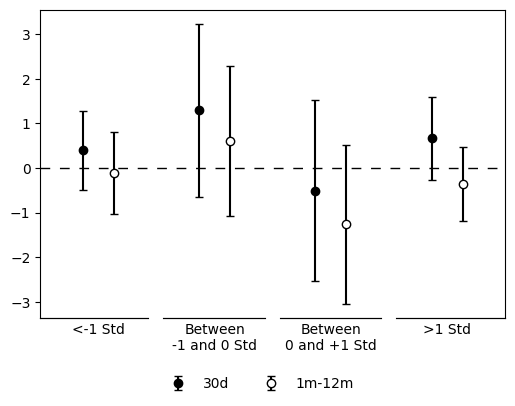

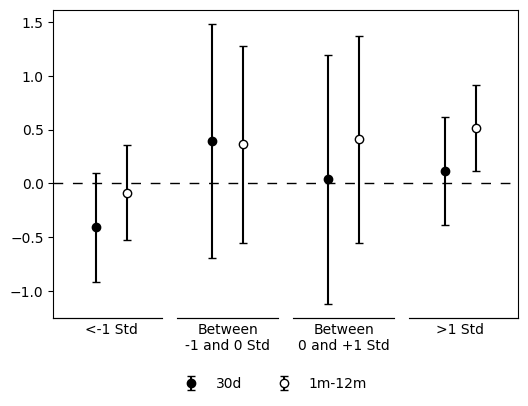

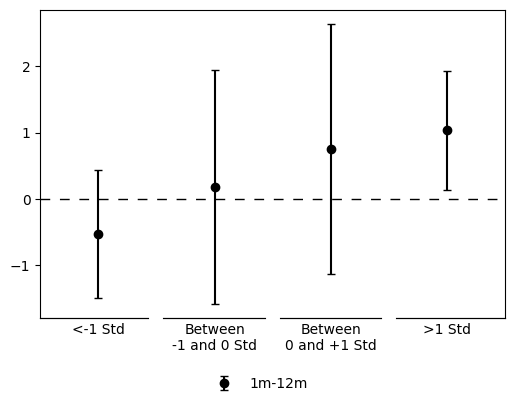

In [208]:
# Fixed effects
importlib.reload(plot_tools)
std=1
temp = "stdm_t"

file_path = rf"{OUTPUTS}\spline_dummies_false_{spi}_{stat}_{temp}  - spthreshold{std} standard_fe.tex"  # Replace with the actual path to your LaTeX file.
outdata = plot_tools.extract_coefficients_and_CI_latex(file_path, file_type="spline")

# Shock labels
names = {
    0: {"shock": "inutero", "death": "30d"},
    1: {"shock": "inutero", "death": "1m-12m"},
    2: {"shock": "30d", "death": "30d"},
    3: {"shock": "30d", "death": "1m-12m"},
    4: {"shock": "1m-12m", "death": "1m-12m"},
}

for var in ["temp", "spi"]:
    # Extract coefficients and ci
    data = {"coefs": [], "upper": [], "lower": []}
    for i in range(5):
        shock = names[i]["shock"]
        for j in ["coefs", "upper", "lower"]:
            ltm1 = outdata[var]["ltm1"][j][i]
            bt0m1 = outdata[var]["bt0m1"][j][i]
            bt01 = outdata[var]["bt01"][j][i]
            gt1 = outdata[var]["gt1"][j][i]
            data[j] += [[ltm1, bt0m1, bt01, gt1]]
            
        if names[i]["death"] == "1m-12m":
            if i!=5:
                labels = [names[i-1]["death"], names[i]["death"]]
            else:
                labels = [names[i-1]["death"]]
            outname = rf"{OUTPUTS}\Figures\coefplot_spline_{var}_{shock}.png"
            plot_tools.plot_spline_coefficients(
                data["coefs"], 
                data["upper"], 
                data["lower"], 
                mfcs=["black", "white"], 
                labels=labels,
                margin=0.1, 
                outpath=outname
            )
            data = {"coefs": [], "upper": [], "lower": []}
    

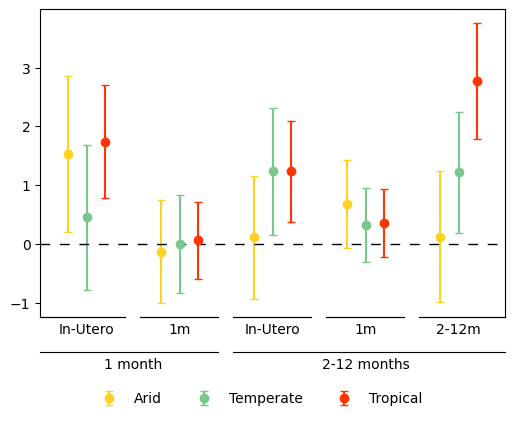

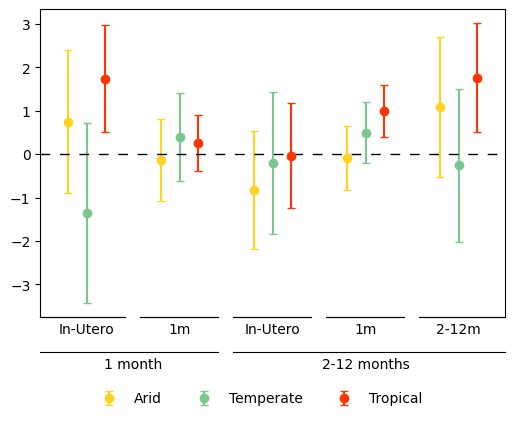

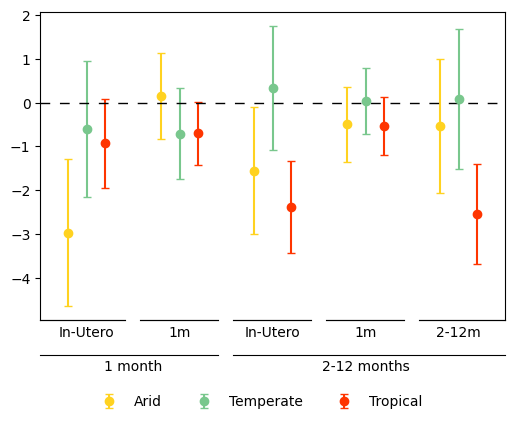

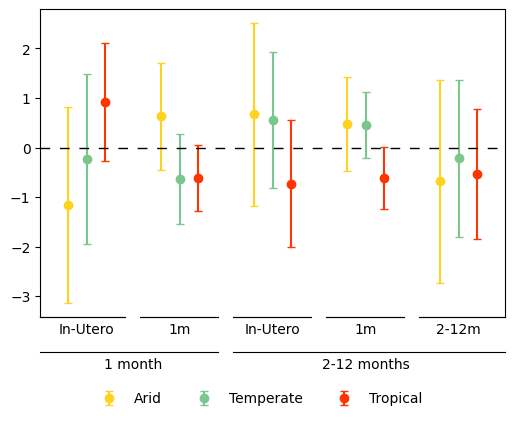

In [280]:
# Heterogeneity: Climate Bands
import os
importlib.reload(plot_tools)

f_name = f"linear_dummies_true_{spi}_{stat}_{temp}"
files = os.listdir(rf"{OUTPUTS}\heterogeneity\climate_band_1")
files = [f for f in files if f_name in f]
files = [f for f in files if "standard_fe.tex" in f]
bands = [f.replace(f"{f_name}  - ", "").replace(" standard_fe.tex", "") for f in files] 

signs = ["pos", "neg"]

for sign in signs:
    values = []
    lower = []
    upper = []

    for i, band in enumerate(bands):

        if band in ["Polar", "Continental"]:
            continue
        file_path = rf"{OUTPUTS}\heterogeneity\climate_band_1\{files[i]}"
    
        outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

        values += [outdata[f"temp_{sign}"]["coefs"] + outdata[f"spi_{sign}"]["coefs"]]
        lower  += [outdata[f"temp_{sign}"]["lower"] + outdata[f"spi_{sign}"]["lower"]]
        upper  += [outdata[f"temp_{sign}"]["upper"] + outdata[f"spi_{sign}"]["upper"]]

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0.1,
        colors=["#ffd220", "#79c78d", "#fe3500"], 
        labels=["Arid","Temperate", "Tropical"], 
        plot="only_temp", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - {temp} {stat} {band} {sign}.png"
    )

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0.1,
        colors=["#ffd220", "#79c78d", "#fe3500"], 
        labels=["Arid","Temperate", "Tropical"], 
        plot="only_spi", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - {spi} {stat} {band} {sign}.png"
    )        

Arid desert
Semi-Arid steppe
Temperate (Dry summer)
Temperate (Dry winter)
Temperate (No dry season)
Tropical (Monsoon)
Tropical (Rainforest)
Tropical (Savanna, dry summer)
Arid desert
Semi-Arid steppe
Temperate (Dry summer)
Temperate (Dry winter)
Temperate (No dry season)
Tropical (Monsoon)
Tropical (Rainforest)
Tropical (Savanna, dry summer)


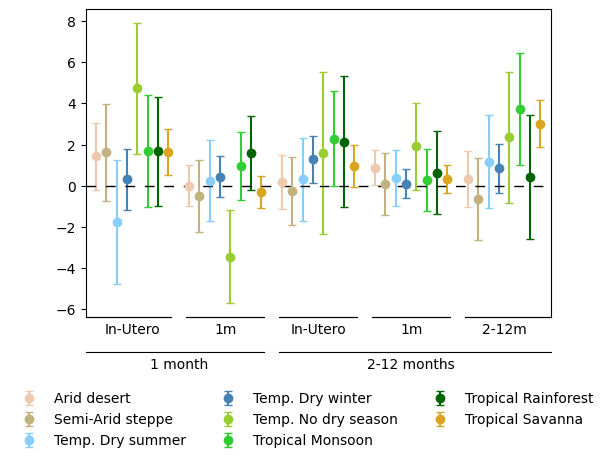

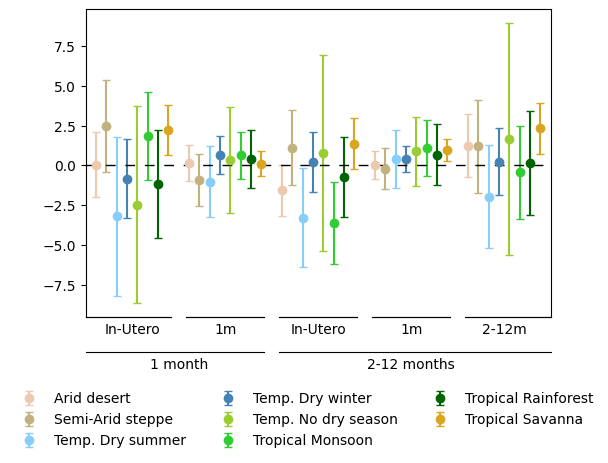

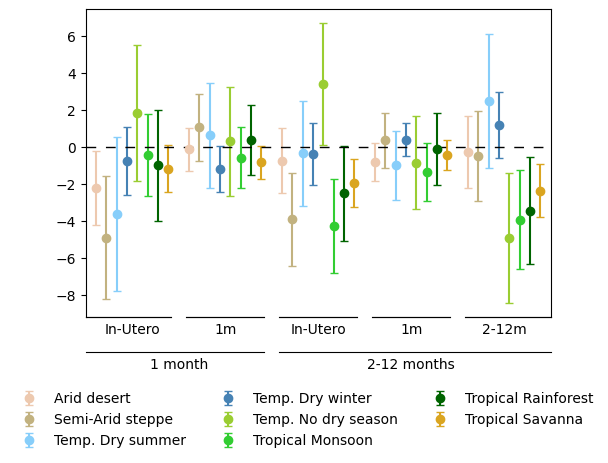

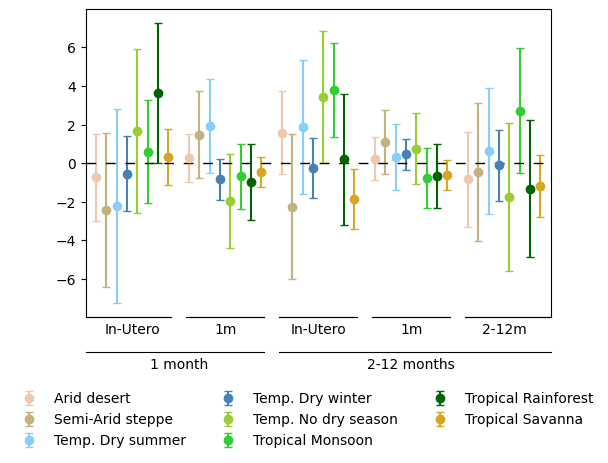

In [284]:
# Heterogeneity: Climate Bands 2
import os
importlib.reload(plot_tools)

f_name = f"linear_dummies_true_{spi}_{stat}_{temp}"
files = os.listdir(rf"{OUTPUTS}\heterogeneity\climate_band_2")
files = [f for f in files if f_name in f]
files = [f for f in files if "standard_fe.tex" in f]
bands = [f.replace(f"{f_name}  - ", "").replace(" standard_fe.tex", "") for f in files] 

signs = ["pos", "neg"]
colors = [
    "#EDC9AF",  # Arid desert (Desert Sand)
    "#C2B280",  # Semi-Arid steppe (Light Khaki)
    "#87CEFA",  # Temperate (Dry summer) (Light Sky Blue)
    "#4682B4",  # Temperate (Dry winter) (Steel Blue)
    "#9ACD32",  # Temperate (No dry season) (YellowGreen)
    "#32CD32",  # Tropical (Monsoon) (Lime Green)
    "#006400",  # Tropical (Rainforest) (Dark Green)
    "#DAA520"   # Tropical Savanna (Goldenrod)
]

labels = [
    "Arid desert",
    "Semi-Arid steppe",
    "Temp. Dry summer",
    "Temp. Dry winter",
    "Temp. No dry season",
    "Tropical Monsoon",
    "Tropical Rainforest",
    "Tropical Savanna"
]
for sign in signs:
    values = []
    lower = []
    upper = []

    for i, band in enumerate(bands):

        file_path = rf"{OUTPUTS}\heterogeneity\climate_band_2\{files[i]}"
    
        n = plot_tools.extract_sample_size(file_path)

        if n < 100_000:
            continue
        print(band)
        
        outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

        values += [outdata[f"temp_{sign}"]["coefs"] + outdata[f"spi_{sign}"]["coefs"]]
        lower  += [outdata[f"temp_{sign}"]["lower"] + outdata[f"spi_{sign}"]["lower"]]
        upper  += [outdata[f"temp_{sign}"]["upper"] + outdata[f"spi_{sign}"]["upper"]]

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0,
        colors=colors,
        labels=labels,
        plot="only_temp", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - {temp} {stat} {band} {sign}.png"
    )

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0,
        colors=colors,
        labels=labels,
        plot="only_spi", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - {spi} {stat} {band} {sign}.png"
    )        

In [305]:
f_name

'linear_dummies_true_spi1_avg_stdm_t'

['linear_dummies_true_spi1_avg_stdm_t  - southern0 standard_fe.tex', 'linear_dummies_true_spi1_avg_stdm_t  - southern1 standard_fe.tex'] ['southern0', 'southern1']


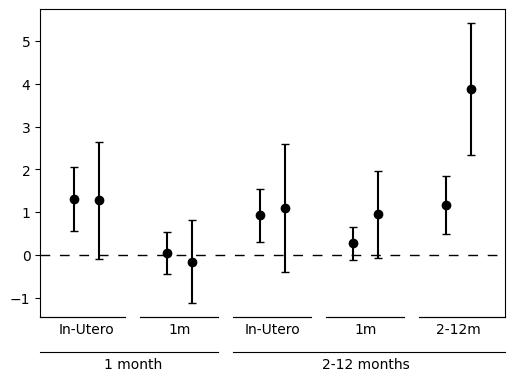

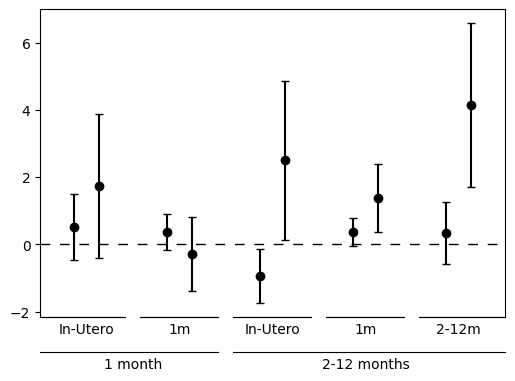

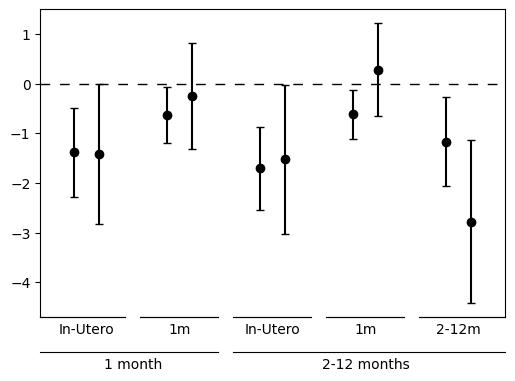

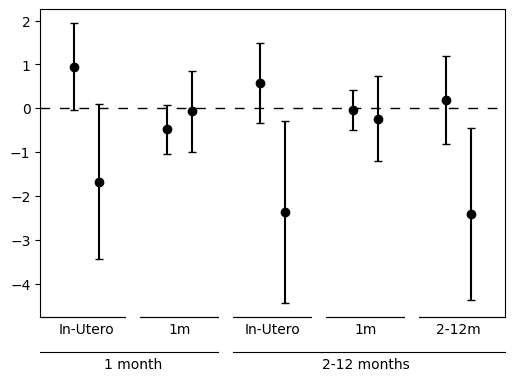

In [304]:
importlib.reload(plot_tools)

def plot_heterogeneity(f_name, var, colors=[], labels=[]):
    
    files = os.listdir(rf"{OUTPUTS}\heterogeneity\{var}")
    files = [f for f in files if f_name in f]
    files = [f for f in files if "standard_fe.tex" in f]
    bands = [f.replace(f"{f_name}  - ", "").replace(" standard_fe.tex", "") for f in files] 
    print(files, bands)
    signs = ["pos", "neg"]

    for sign in signs:
        values = []
        lower = []
        upper = []

        for i, band in enumerate(bands):

            file_path = rf"{OUTPUTS}\heterogeneity\\{var}\{files[i]}"
            n = plot_tools.extract_sample_size(file_path)

            if n < 10_000:
                continue

            outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

            values += [outdata[f"temp_{sign}"]["coefs"] + outdata[f"spi_{sign}"]["coefs"]]
            lower  += [outdata[f"temp_{sign}"]["lower"] + outdata[f"spi_{sign}"]["lower"]]
            upper  += [outdata[f"temp_{sign}"]["upper"] + outdata[f"spi_{sign}"]["upper"]]

        if len(colors)>0:
            if (len(colors)!=len(values)) or (len(labels)!=len(values)):
                raise ValueError(f"Number of colors and labels must match the number of bands: {values}")
        
        plot_tools.plot_regression_coefficients(
            values, 
            upper,
            lower,
            margin=0.1,
            colors=colors, 
            labels=labels, 
            plot="only_temp", 
            outpath=rf"{OUTPUTS}\Figures\heterogeneity - {var} - {temp} {stat} {band} {sign}.png"
        )

        plot_tools.plot_regression_coefficients(
            values, 
            upper,
            lower,
            margin=0.1,
            colors=colors, 
            labels=labels, 
            plot="only_spi", 
            outpath=rf"{OUTPUTS}\Figures\heterogeneity - {var} - {spi} {stat} {band} {sign}.png"
        )        

plot_heterogeneity("southern")

Low income
Lower middle income
Upper middle income
Low income
Lower middle income
Upper middle income


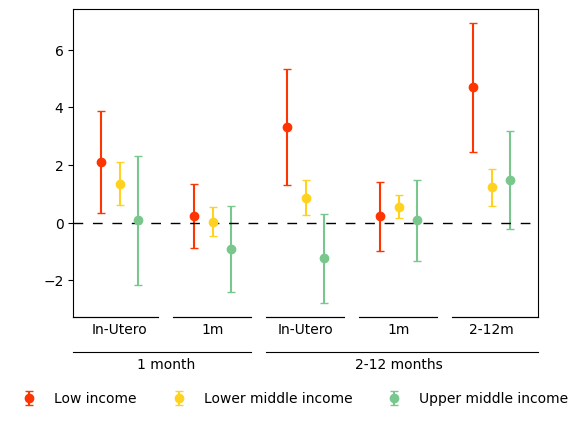

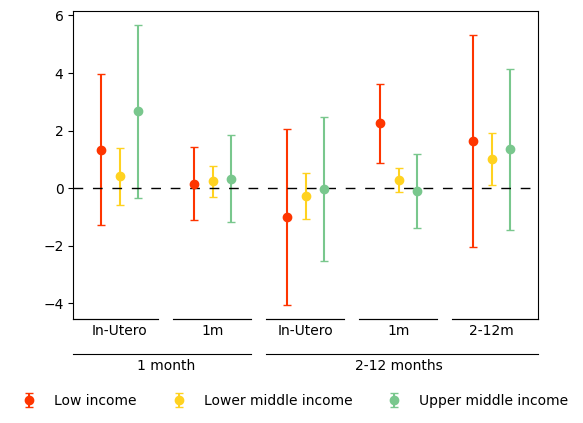

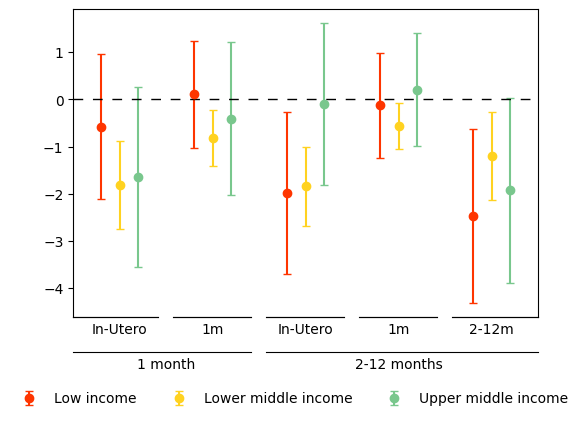

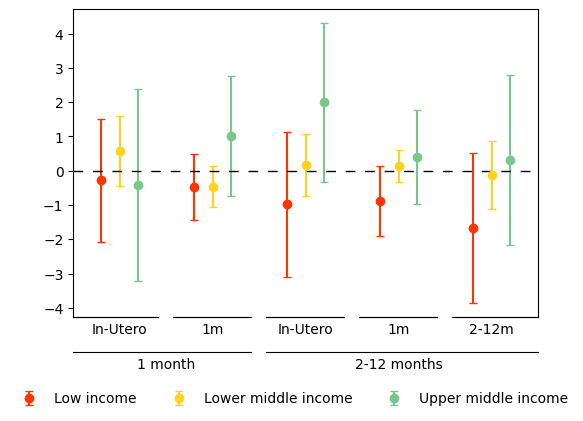

In [278]:
### Figure 4: Climate bands 1 heterogeneity

f_name = f"linear_dummies_true_{spi}_{stat}_{temp}"


3388771
southern0
894257
southern1
3388771
southern0
894257
southern1


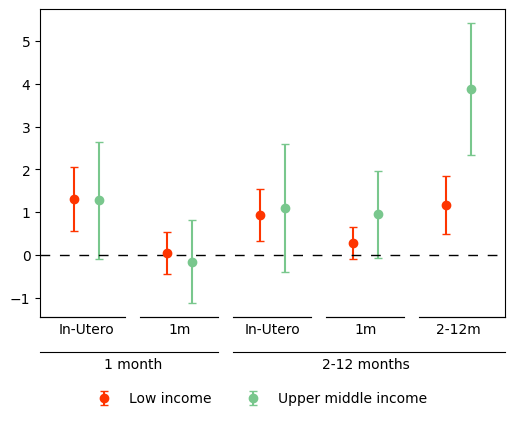

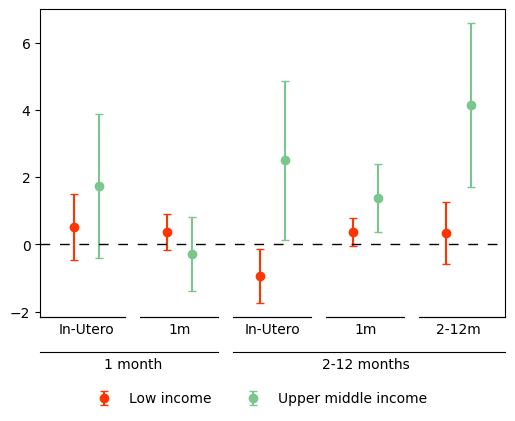

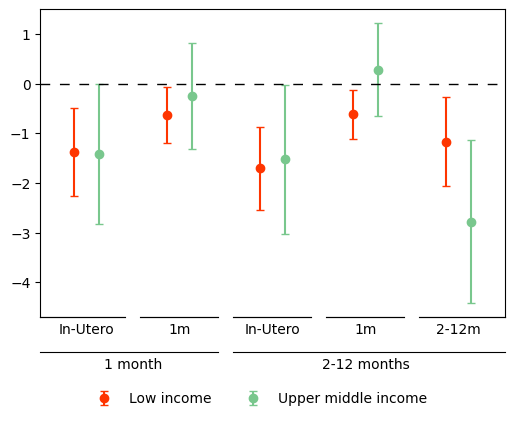

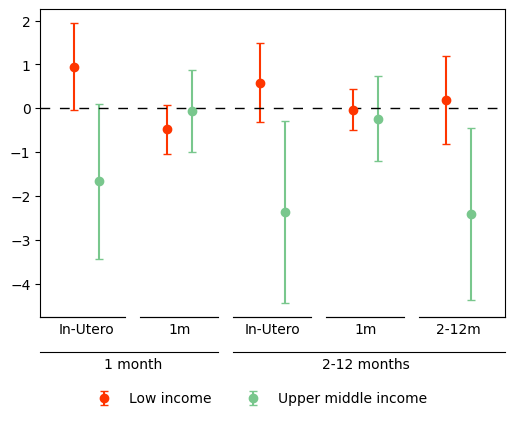

In [275]:
### Figure 4: Climate bands 1 heterogeneity
importlib.reload(plot_tools)
f_name = f"linear_dummies_true_{spi}_{stat}_{temp}"
files = os.listdir(rf"{OUTPUTS}\heterogeneity\\southern")
files = [f for f in files if f_name in f]
files = [f for f in files if "standard_fe.tex" in f]
bands = [f.replace(f"{f_name}  - ", "").replace(" standard_fe.tex", "") for f in files] 

signs = ["pos", "neg"]

for sign in signs:
    values = []
    lower = []
    upper = []

    for i, band in enumerate(bands):

        file_path = rf"{OUTPUTS}\heterogeneity\\southern\{files[i]}"
        n = plot_tools.extract_sample_size(file_path)
        print(n)
        if n < 100_000:
            continue
        print(band)

        outdata = plot_tools.extract_coefficients_and_CI_latex(file_path)

        values += [outdata[f"temp_{sign}"]["coefs"] + outdata[f"spi_{sign}"]["coefs"]]
        lower  += [outdata[f"temp_{sign}"]["lower"] + outdata[f"spi_{sign}"]["lower"]]
        upper  += [outdata[f"temp_{sign}"]["upper"] + outdata[f"spi_{sign}"]["upper"]]

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0.1,
        colors=["#fe3500", "#79c78d",], 
        labels=["Low income","Upper middle income"], 
        plot="only_temp", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - Income group - {temp} {stat} {band} {sign}.png"
    )

    plot_tools.plot_regression_coefficients(
        values, 
        upper,
        lower,
        margin=0.1,
        colors=["#fe3500", "#79c78d",], 
        labels=["Low income","Upper middle income"],         
        plot="only_spi", 
        outpath=rf"{OUTPUTS}\Figures\heterogeneity - Income group - {spi} {stat} {band} {sign}.png"
    )        


In [306]:
f_name

'linear_dummies_true_spi1_avg_stdm_t'